## Movie MetaData Data Cleaning / Wrangling / EDA / Feature Engineering

## Table of Content:
* [Load Data](#Load_Data)
* [Merge Data](#Merge_Data)
* [Data Cleaning/Wrangling](#Data_cleaning)
* [Exploratory Data Analysis](#EDA)
    * [EDA With Cast/Cerw](#EDA_CC)
* [Feature Engineering for Regression/Classification/RecomenderSystem](#Reg_revenue)

In [176]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import plotly
import plotly.offline as py
import seaborn as sns
import datetime
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.preprocessing import MinMaxScaler


import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', 50)

### Load Movie metadata

<a class="anchor" id="Load_Data"></a>

In [177]:
# read the movie metadata to analyze
df = pd.read_csv('input/movies_metadata.csv')
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [178]:
# shape of the dataset
df.shape

(45466, 24)

**The dataset consists of 45466 movies with 24 features** 

### Load Credit data

In [179]:
# read the credit data for cast and crew
credits_df = pd.read_csv('input/credits.csv')
credits_df.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [180]:
credits_df.shape

(45476, 3)

<a class="anchor" id="Merge_Data"></a>

### Merge the data
We will perform a merge of the dataset based on the id column for which we will have to conver the id column of movie metadata to integer and then merge it

In [181]:
# function to convert to int
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [182]:
# convert the id's to int to merge
df['id'] = df['id'].apply(convert_int)

In [183]:
# merge id based on id
df = df.merge(credits_df, on='id')
df.shape

(45538, 26)

In [184]:
# columns of the dataframe
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'cast', 'crew'],
      dtype='object')

**Features**

- **adult:** Indicates if the movie is X-Rated or Adult.
- **belongs_to_collection:** A stringified dictionary that gives information on the movie series the particular film belongs to.
- **budget:** The budget of the movie in dollars.
- **genres:** A stringified list of dictionaries that list out all the genres associated with the movie.
- **homepage:** The Official Homepage of the move.
- **id:** The ID of the move.
- **imdb_id:** The IMDB ID of the movie.
- **original_language:** The language in which the movie was originally shot in.
- **original_title:** The original title of the movie.
- **overview:** A brief blurb of the movie.
- **popularity:** The Popularity Score assigned by TMDB.
- **poster_path:** The URL of the poster image.
- **production_companies:** A stringified list of production companies involved with the making of the movie.
- **production_countries:** A stringified list of countries where the movie was shot/produced in.
- **release_date:** Theatrical Release Date of the movie.
- **revenue:** The total revenue of the movie in dollars.
- **runtime:** The runtime of the movie in minutes.
- **spoken_languages:** A stringified list of spoken languages in the film.
- **status:** The status of the movie (Released, To Be Released, Announced, etc.)
- **tagline:** The tagline of the movie.
- **title:** The Official Title of the movie.
- **video:** Indicates if there is a video present of the movie with TMDB.
- **vote_average:** The average rating of the movie.
- **vote_count:** The number of votes by users, as counted by TMDB.
- **cast:** The cast of the movie
- **crew:** The crew of the movie

<a class="anchor" id="Data_cleaning"></a>

### Data Cleaning/Wrangling

In [185]:
# info to see nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45538 entries, 0 to 45537
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45538 non-null  object 
 1   belongs_to_collection  4500 non-null   object 
 2   budget                 45538 non-null  object 
 3   genres                 45538 non-null  object 
 4   homepage               7792 non-null   object 
 5   id                     45538 non-null  float64
 6   imdb_id                45521 non-null  object 
 7   original_language      45527 non-null  object 
 8   original_title         45538 non-null  object 
 9   overview               44584 non-null  object 
 10  popularity             45535 non-null  object 
 11  poster_path            45152 non-null  object 
 12  production_companies   45535 non-null  object 
 13  production_countries   45535 non-null  object 
 14  release_date           45451 non-null  object 
 15  re

**From the above info we see `homepage` and `tagline` having most null values** 

**We dont need the imdb id so we can drop it**

In [186]:
# drop the imdb_id
df.drop(['imdb_id'], axis=1, inplace=True)

# We also do not need the original title as we have the official title in place
df.drop('original_title', axis=1, inplace=True)

In [187]:
# check for how many records have revenue na
df['revenue'].isna().sum()

3

In [188]:
# check how many records have revenue as 0
(df['revenue'] == 0 ).sum()

38107

**We have 38107 movies whose revenue is 0 and 3 of them are NaN , we will replace the 0 with NaN and still use the remaining for our analysis because revenue is an important factor**

In [189]:
# replace 0 with nan for revenue
df['revenue'].replace(0, np.nan, inplace=True)

**Similarly with the budget, we will convert all the values of 0 with NaN to indicate the absence of information regarding budget.**

In [190]:
# adding the error='coerce' as there are are some unparsed data
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')

# replace all the zeros to NaN
df['budget'].replace(0, np.nan, inplace= True)
df[df['budget'].isnull()].shape

(36626, 24)

**We will now create a new feature called return -> which is the ratio of revenue to budget , so a return > 1 will indicate a profit and a value < 1 will indicate a loss**

In [191]:
df['return'] = df['revenue'] / df['budget']
# check how many of them are null
df[df['return'].isnull()].shape

(40145, 25)

**From the above data we see we have close to 5000 movies which gives us the information on return , which is very less when compared to the original data but will be useful to identify insight information**

**We now extract the year form the release_date and create a new feature as year**

In [192]:
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: 
                                                                       str(x).split('-')[0] 
                                                                       if x != np.nan else np.nan)

**As we can see below we have 9 adult movies in the dataset we can drop the records as we dont wanth to have then in our analysis**

In [193]:
(df['adult']=='True').sum()

9

In [194]:
index_to_drop = df[df['adult']=='True'].index
index_to_drop

Index([19561, 28785, 32014, 32193, 39979, 39980, 40650, 41085, 43165], dtype='int64')

In [195]:
# drop these indices
df.drop(index_to_drop, inplace=True)

In [196]:
# # create the poster url to get the images to show in our analysis
base_poster_url = 'http://image.tmdb.org/t/p/w185/'
df['poster_path'] = "<img src='" + base_poster_url + df['poster_path'] + "' style='height:100px;'>"

# # pull up a poster to test
df['poster_path'].head()[1]

"<img src='http://image.tmdb.org/t/p/w185//vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg' style='height:100px;'>"

<a class="anchor" id="EDA"></a>

<img src='http://image.tmdb.org/t/p/w185//vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg' style='height:100px;'>

### Exploratory Data Analysis

**First lets check what all words are more familliar and present in movie title and the overview more often , and lets visalize it with the word cloud**

In [197]:
# convert the title and overview to string
df['title'] = df['title'].astype('str')
df['overview'] = df['overview'].astype('str')

In [198]:
# create srtings for title and overview for wordcount
title_corpus = ' '.join(df['title'])
overview_corpus = ' '.join(df['overview'])

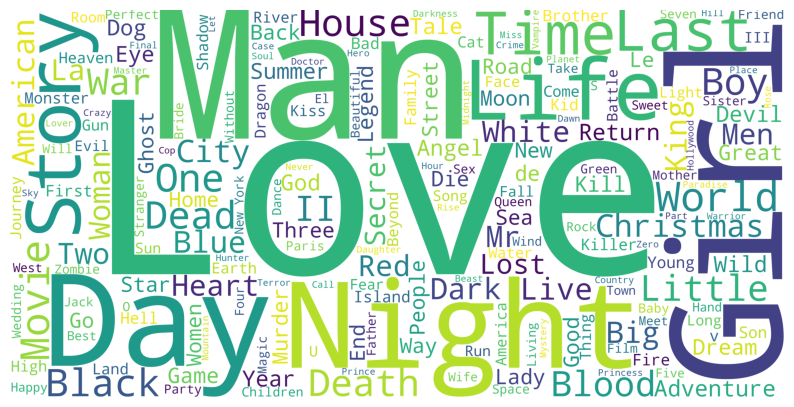

In [199]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', 
                            height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(10,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

**The word Love is the most commonly used word in movie titles. Girl, Day and Man are also among the most commonly occuring words. Which kind of show that romance movies are the most common among all the movies**

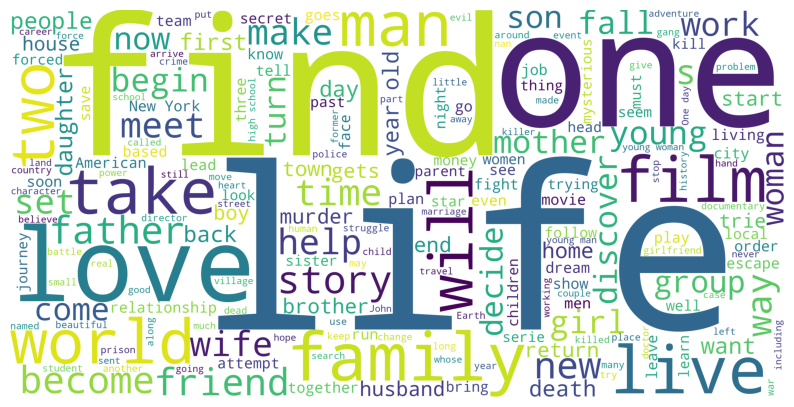

In [200]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', 
                               height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(10,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

**Life is the most commonly used word in Movie titles. One and Find,love are also popular in Movie overview. Together with Love, Man and Girl, these wordclouds give us a pretty good idea of the most popular themes present in movies.**

**Production Companies**

The Full MovieLens Dataset consists of movies that are mostly in the English language. We would like to see which countries serve as the most popular destinations for shooting movies by filmmakers.

In [201]:
# parse the dictionary data and create list of production countries 
df['production_countries'] = df['production_countries'].fillna('[]').apply(ast.literal_eval)
df['production_countries'] = df['production_countries'].apply(lambda x: [i['name'] for i in x] 
                                                              if isinstance(x, list) else [])

In [202]:
# create a series of countries 
s = df.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'countries'

In [203]:
# create a dataframe to display the information
con_df = df.drop('production_countries', axis=1).join(s)
con_df = pd.DataFrame(con_df['countries'].value_counts())
con_df['country'] = con_df.index
con_df.columns = ['num_movies', 'country']
con_df = con_df.reset_index().drop('countries', axis=1)
con_df.head(10)

,num_movies,country
0,21178,United States of America
1,4103,United Kingdom
2,3957,France
3,2266,Germany
4,2174,Italy
5,1766,Canada
6,1654,Japan
7,963,Spain
8,912,Russia
9,830,India


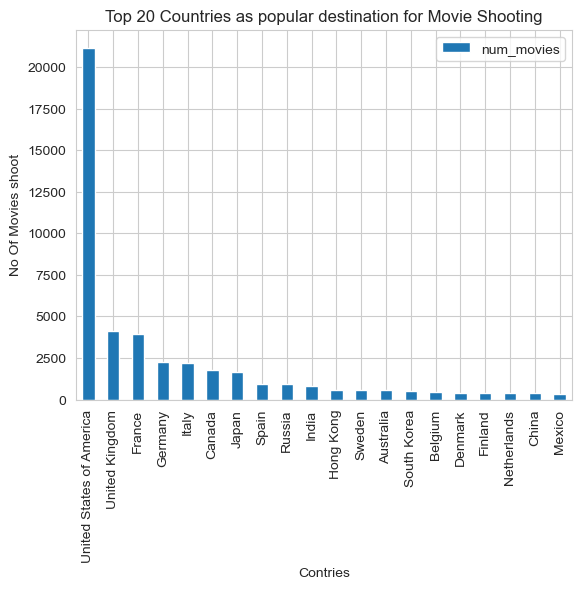

In [204]:
# lets see top 20 countries serving the popular destination for shooting movies
con_df.head(20).plot.bar('country','num_movies')
plt.xlabel('Contries')
plt.ylabel('No Of Movies shoot')
plt.title('Top 20 Countries as popular destination for Movie Shooting')
plt.show()

**From the above data we see that United States of America and UK are the most popular destinaiton for shooting a movie**

In [205]:
# Plot the map to get a visualization of the information aboveb
data = [ dict(
        type = 'choropleth',
        locations = con_df['country'],
        locationmode = 'country names',
        z = con_df['num_movies'],
        text = con_df['country'],
        colorscale = [[0,'rgb(255, 255, 255)'],[1,'rgb(255, 0, 0)']],
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Production Countries'),
      ) ]

layout = dict(
    title = 'Production Countries for the MovieLens Movies',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

**From the above visualization its clear that United States of America has the most movie shootings hapenning and its the popular destination**

### Lets now look at the highest/most successfull production companies

In [206]:
# exiting columns
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'original_language', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count', 'cast', 'crew', 'return',
       'year'],
      dtype='object')

In [207]:
# parse the dictionary data to a list of production companies
df['production_companies'] = df['production_companies'].fillna('[]').apply(ast.literal_eval)
df['production_companies'] = df['production_companies'].apply(lambda x: [i['name'] for i in x] 
                                                              if isinstance(x, list) else [])

In [208]:
# create a series of countries 
s = df.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'companies'

In [209]:
# create dataframe to show infomation about the production companies
com_df = df.drop('production_companies', axis=1).join(s)

# create a dataframe to show the details 
com_sum = pd.DataFrame(com_df.groupby('companies')['revenue'].sum().sort_values(ascending=False))
com_sum.columns = ['Total']
com_mean = pd.DataFrame(com_df.groupby('companies')['revenue'].mean().sort_values(ascending=False))
com_mean.columns = ['Average']
com_count = pd.DataFrame(com_df.groupby('companies')['revenue'].count().sort_values(ascending=False))
com_count.columns = ['Number']

com_pivot = pd.concat((com_sum, com_mean, com_count), axis=1)

In [210]:
# get the high revenue companies
high_rev = com_pivot.sort_values('Total', ascending=False).head(10)
high_rev

,Total,Average,Number
companies,,,
Warner Bros.,6.352519e+10,1.293792e+08,491
Universal Pictures,5.525919e+10,1.193503e+08,463
Paramount Pictures,4.888578e+10,1.225208e+08,399
Twentieth Century Fox Film Corporation,4.768775e+10,1.398468e+08,341
Walt Disney Pictures,4.083727e+10,2.778046e+08,147
Columbia Pictures,3.227974e+10,1.367785e+08,236
New Line Cinema,2.217339e+10,1.119868e+08,198
Amblin Entertainment,1.734372e+10,2.550547e+08,68
DreamWorks SKG,1.547575e+10,1.984071e+08,78


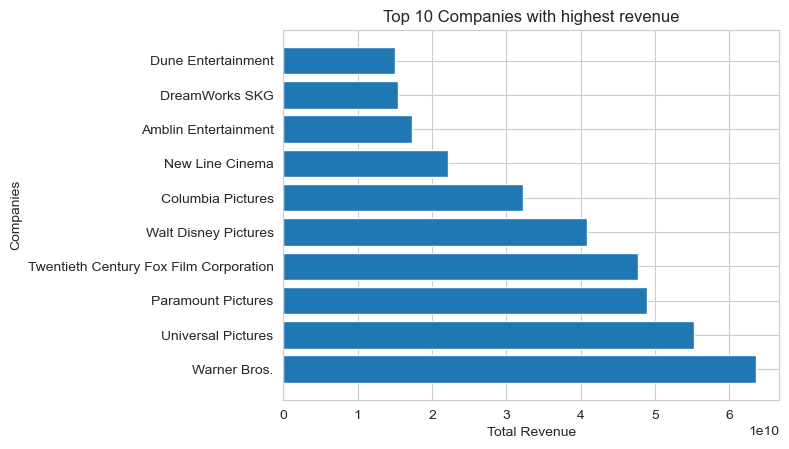

In [211]:
# lets see top 10 countries serving the popular destination for shooting movies
plt.barh(high_rev.index, high_rev['Total'])
plt.xlabel('Total Revenue')
plt.ylabel('Companies')
plt.title('Top 10 Companies with highest revenue')
plt.show()

**From the data we see that warner Bros has the highest revenue among all**

### Lets now look at the most successfull Movie

In [212]:
# take the data that belongs to collection
# parse the dictionary data to list of belongs to collection
df_fran = df[df['belongs_to_collection'].notnull()]
collec = df_fran['belongs_to_collection'].apply(ast.literal_eval).apply(lambda x: x['name'] 
                                                                        if isinstance(x, dict) else np.nan)

df_fran['belongs_to_collection'] = collec
df_fran = df_fran[df_fran['belongs_to_collection'].notnull()]

In [213]:
# create pivot
fran_pivot = df_fran.pivot_table(index='belongs_to_collection', values='revenue', 
                                 aggfunc={'revenue': ['mean', 'sum', 'count']}).reset_index()

In [214]:
# highest gross movie franchies
high_gross_movie =fran_pivot.sort_values('sum', ascending=False).head(10)
high_gross_movie

,belongs_to_collection,count,mean,sum
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
646,James Bond Collection,26,2.733450e+08,7.106970e+09
1317,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09
1550,Transformers Collection,5,8.732202e+08,4.366101e+09
325,Despicable Me Collection,4,9.227676e+08,3.691070e+09
1491,The Twilight Collection,5,6.684215e+08,3.342107e+09
610,Ice Age Collection,5,6.433417e+08,3.216709e+09
666,Jurassic Park Collection,4,7.578710e+08,3.031484e+09


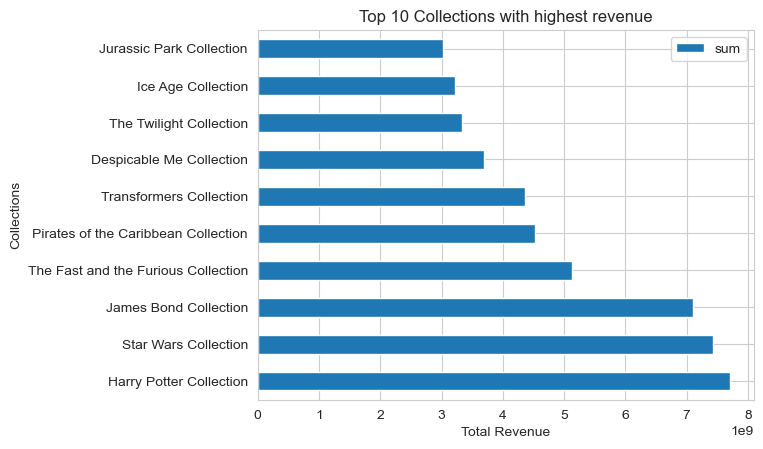

In [215]:
# lets see top 10 collection having highest revenue
high_gross_movie.plot.barh('belongs_to_collection', 'sum')
plt.xlabel('Total Revenue')
plt.ylabel('Collections')
plt.title('Top 10 Collections with highest revenue')
plt.show()

**From the above data we see `Harry Porter collection` and `Star Wars collection` is the highest gross movie franchies**

### Most successfull movie franchies by average gross

In [216]:
fran_pivot.sort_values('mean', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
112,Avatar Collection,1,2.787965e+09,2.787965e+09
1245,The Avengers Collection,2,1.462481e+09,2.924962e+09
479,Frozen Collection,1,1.274219e+09,1.274219e+09
446,Finding Nemo Collection,2,9.844532e+08,1.968906e+09
1352,The Hobbit Collection,3,9.785078e+08,2.935523e+09
1388,The Lord of the Rings Collection,3,9.721816e+08,2.916545e+09
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
325,Despicable Me Collection,4,9.227676e+08,3.691070e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09


**From the above data we see `Avatar Collection` and `Avengers` are the most successfull movie franchaies** 

### Lets look for movie release dates

In [217]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [218]:
# function to get the month and the day
def get_month(x):
    try:
        return month_order[int(str(x).split('-')[1]) - 1]
    except:
        return np.nan
    
def get_day(x):
    try:
        year, month, day = (int(i) for i in x.split('-'))    
        answer = datetime.date(year, month, day).weekday()
        return day_order[answer]
    except:
        return np.nan

In [219]:
# create features to get months and days
df['day'] = df['release_date'].apply(get_day)
df['month'] = df['release_date'].apply(get_month)

<Axes: title={'center': 'Number of Movies released in a particular month.'}, xlabel='month', ylabel='count'>

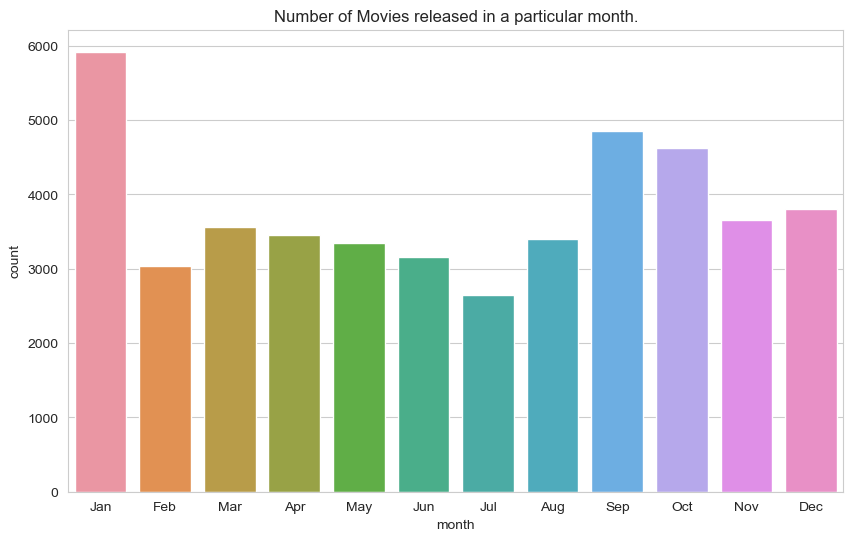

In [220]:
# plot the data for movies released in a month
plt.figure(figsize=(10,6))
plt.title("Number of Movies released in a particular month.")
sns.countplot(x='month', data=df, order=month_order)

<Axes: title={'center': 'Number of Movies released on a particular day.'}, xlabel='day', ylabel='count'>

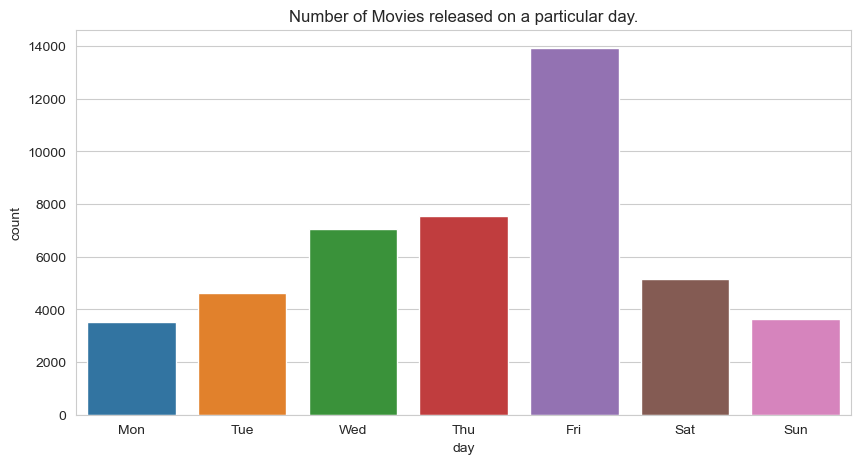

In [221]:
# plot for which day it has the highest no of releases
plt.figure(figsize=(10,5))
plt.title("Number of Movies released on a particular day.")
sns.countplot(x='day', data=df, order=day_order)

**From the above data we see the most of the movies are released in January and its on Friday, any probably the most sucesfull movies are released on the this day of the month**

<a class="anchor" id="EDA_CC"></a>

### Lets perform some EDA on the Cast and crew information

In [222]:
# lets first convert the data of cast and crew to list
df['cast'] = df['cast'].apply(ast.literal_eval)
df['crew'] = df['crew'].apply(ast.literal_eval)

In [223]:
df['cast_size'] = df['cast'].apply(lambda x: len(x))
df['crew_size'] = df['crew'].apply(lambda x: len(x))

In [224]:
df['cast'] = df['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
df['cast'].head()

0    [Tom Hanks, Tim Allen, Don Rickles, Jim Varney...
1    [Robin Williams, Jonathan Hyde, Kirsten Dunst,...
2    [Walter Matthau, Jack Lemmon, Ann-Margret, Sop...
3    [Whitney Houston, Angela Bassett, Loretta Devi...
4    [Steve Martin, Diane Keaton, Martin Short, Kim...
Name: cast, dtype: object

In [225]:
# now lets get the director name out of the crew column and create a new column as director
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

df['director'] = df['crew'].apply(get_director)
df['director'].head()

0      John Lasseter
1       Joe Johnston
2      Howard Deutch
3    Forest Whitaker
4      Charles Shyer
Name: director, dtype: object

**Now lets take a look at the actors and directors who have earned most amount of money with their movie**

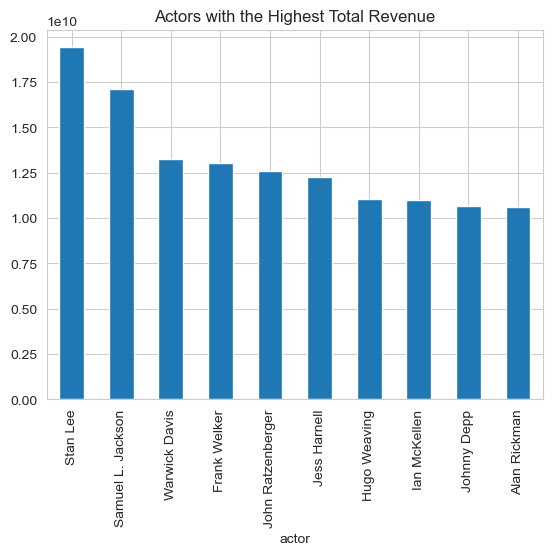

In [226]:
# create a dataframe for cast info
s = df.apply(lambda x: pd.Series(x['cast']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'actor'
cast_df = df.drop('cast', axis=1).join(s)

sns.set_style('whitegrid')
plt.title('Actors with the Highest Total Revenue')
cast_df.groupby('actor')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

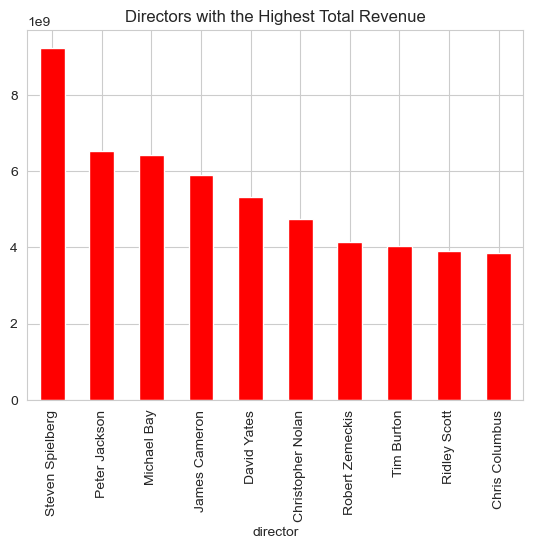

In [227]:
# directors with the highest revenue
plt.title('Directors with the Highest Total Revenue')
df.groupby('director')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar', colormap='autumn')
plt.show()

**From the above data we see that Actor: Stan Lee and Director:Steven Spielberg has the highest income among all**

<a class="anchor" id="Reg_revenue"></a>

### Final Dataset to be used for models and recomender system

### Feature Engineering

For a movie revenue prediction most of the features which are used in papers include Facebook Page Likes, Information on Tweets about the Movie, YouTube Trailer Reaction (Views, Likes, Dislikes, etc.), Movie Rating (MPCAA, CBIFC) among many others. But we dont have those features in our dataset.

So we will be using TMDB's Popularity Score and Vote Average as our features in our model to assign a nuemerical value to popularity. However, it must be kept in mind that these metrics will not be available when predicting movie revenues in the real world, when the movie has not been released yet.

In [228]:
# create the features for popularity, vote_count, vote_average
def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan
    
df['popularity'] = df['popularity'].apply(clean_numeric).astype('float')
df['vote_count'] = df['vote_count'].apply(clean_numeric).astype('float')
df['vote_average'] = df['vote_average'].apply(clean_numeric).astype('float')
df['year'] = df['year'].apply(clean_numeric).astype('float')

In [229]:
# lets take the genres names out of the dictionary and have the data as list
df['genres'] = df['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: 
                                                                       [i['name'] for i in x] 
                                                                       if isinstance(x, list) else [])

# convert the dictionary form of spoken language to number of language it was released in
df['spoken_languages'] = df['spoken_languages'].fillna('[]').apply(ast.literal_eval).apply(lambda x: 
                                                                                           len(x) 
                                                                                           if isinstance(x, list) 
                                                                                           else np.nan)

In [247]:
# we will remove some unwanted features
final_data = df.copy()
final_data = final_data.drop(['status', 'video', 'crew'], axis=1)

# create the genres dictionary to series for independent feature 
s = final_data.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
gen_final = final_data.drop('genres', axis=1).join(s)
gen_final = gen_final[~gen_final['genre'].isna()]
genres_final = gen_final['genre'].drop_duplicates()

In [242]:
final_data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,...,vote_average,vote_count,cast,return,year,day,month,cast_size,crew_size,director
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862.0,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,<img src='http://image.tmdb.org/t/p/w185//rhIR...,...,7.7,5415.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",12.451801,1995.0,Mon,Oct,13,106,John Lasseter
1,False,NaN,65000000.0,"[Adventure, Fantasy, Family]",NaN,8844.0,en,When siblings Judy and Peter discover an encha...,17.015539,<img src='http://image.tmdb.org/t/p/w185//vzmL...,...,6.9,2413.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",4.043035,1995.0,Fri,Dec,26,16,Joe Johnston
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"[Romance, Comedy]",NaN,15602.0,en,A family wedding reignites the ancient feud be...,11.712900,<img src='http://image.tmdb.org/t/p/w185//6ksm...,...,6.5,92.0,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",NaN,1995.0,Fri,Dec,7,4,Howard Deutch
3,False,NaN,16000000.0,"[Comedy, Drama, Romance]",NaN,31357.0,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,<img src='http://image.tmdb.org/t/p/w185//16XO...,...,6.1,34.0,"[Whitney Houston, Angela Bassett, Loretta Devi...",5.090760,1995.0,Fri,Dec,10,10,Forest Whitaker
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",NaN,[Comedy],NaN,11862.0,en,Just when George Banks has recovered from his ...,8.387519,<img src='http://image.tmdb.org/t/p/w185//e64s...,...,5.7,173.0,"[Steve Martin, Diane Keaton, Martin Short, Kim...",NaN,1995.0,Fri,Feb,12,7,Charles Shyer


We will perform some more feature engineering tasks:

- **belongs_to_collection** will be turned into a Boolean variable. 1 indicates a movie is a part of collection whereas 0 indicates it is not.
- **genres** will be converted into number of genres.
- **homepage** will be converted into a Boolean variable that will indicate if a movie has a homepage or not.
- **original_language** will be replaced by a feature called is_foreign to denote if a particular film is in English or a Foreign Language.
- **production_companies** will be replaced with just the number of production companies collaborating to make the movie.
- **production_countries** will be replaced with the number of countries the film was shot in.
- **day** will be converted into a binary feature to indicate if the film was released on a Friday.
- **month** will be converted into a variable that indicates if the month was a holiday season.

In [248]:
def feature_engineering(data):
    data['belongs_to_collection'] = data['belongs_to_collection'].apply(lambda x: 0 if pd.isna(x) else 1)
    
    for genre in genres_final:
        data['is_' + str(genre)] = data['genres'].apply(lambda x: 1 if genre in x else 0)
    
    data['genres'] = data['genres'].apply(lambda x: len(x))
    
    data['homepage'] = data['homepage'].apply(lambda x: 0 if x == np.nan else 1)
    
    # 1 for english and 0 for all
    data['is_english'] = data['original_language'].apply(lambda x: 1 if x=='en' else 0)
    data = data.drop('original_language', axis=1)
    
    # populate the numbers for production companies and countries
    data['production_companies'] = data['production_companies'].apply(lambda x: len(x))
    data['production_countries'] = data['production_countries'].apply(lambda x: len(x))
    
    # set 1 for friday else 0
    data['is_Friday'] = data['day'].apply(lambda x: 1 if x=='Fri' else 0)
    data = data.drop('day', axis=1)
    
    # set 1 for holiday else 0
    data['is_Holiday'] = data['month'].apply(lambda x: 1 if x in ['Apr', 'May', 'Jun', 'Nov'] else 0)
    data = data.drop('month', axis=1)
    #data = data.drop(['cast', 'director'], axis=1)
    
    # create dummies
    #data = pd.get_dummies(data, prefix='is')
    
    # fill the na's with mean
    data['runtime'] = data['runtime'].fillna(data['runtime'].mean())
    data['vote_average'] = data['vote_average'].fillna(data['vote_average'].mean())
    
    # convert the id to integer
    data['id'] = data['id'].apply(convert_int)
    
    # drop adult column
    data = data.drop(['adult'], axis =1)
    
    return data

In [249]:
ft_data = feature_engineering(final_data)

In [250]:
ft_data.head()

,belongs_to_collection,budget,genres,homepage,id,overview,popularity,poster_path,production_companies,production_countries,...,is_Mystery,is_War,is_Foreign,is_Music,is_Documentary,is_Western,is_TV Movie,is_english,is_Friday,is_Holiday
0,1,30000000.0,3,1,862,"Led by Woody, Andy's toys live happily in his ...",21.946943,<img src='http://image.tmdb.org/t/p/w185//rhIR...,1,1,...,0,0,0,0,0,0,0,1,0,0
1,0,65000000.0,3,1,8844,When siblings Judy and Peter discover an encha...,17.015539,<img src='http://image.tmdb.org/t/p/w185//vzmL...,3,1,...,0,0,0,0,0,0,0,1,1,0
2,1,NaN,2,1,15602,A family wedding reignites the ancient feud be...,11.712900,<img src='http://image.tmdb.org/t/p/w185//6ksm...,2,1,...,0,0,0,0,0,0,0,1,1,0
3,0,16000000.0,3,1,31357,"Cheated on, mistreated and stepped on, the wom...",3.859495,<img src='http://image.tmdb.org/t/p/w185//16XO...,1,1,...,0,0,0,0,0,0,0,1,1,0
4,1,NaN,1,1,11862,Just when George Banks has recovered from his ...,8.387519,<img src='http://image.tmdb.org/t/p/w185//e64s...,2,1,...,0,0,0,0,0,0,0,1,1,0


In [251]:
ft_data.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'tagline', 'title', 'vote_average', 'vote_count',
       'cast', 'return', 'year', 'cast_size', 'crew_size', 'director',
       'is_Animation', 'is_Comedy', 'is_Family', 'is_Adventure', 'is_Fantasy',
       'is_Romance', 'is_Drama', 'is_Action', 'is_Crime', 'is_Thriller',
       'is_Horror', 'is_History', 'is_Science Fiction', 'is_Mystery', 'is_War',
       'is_Foreign', 'is_Music', 'is_Documentary', 'is_Western', 'is_TV Movie',
       'is_english', 'is_Friday', 'is_Holiday'],
      dtype='object')

In [253]:
# save the data to be used further
ft_data.to_csv("input/engineered_data.csv", index=False)

**Note : We did not dorp the NaN for revenue/budget as part of for the records beacuase we might need some information in model building and recomender system , so where ever we dont need it we can drop it later, as droping those data we are loosing lot of records**